# Keras: Boston House prices

we will attempt the Boston House prices regression problem

first, we import our main math stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')
import math

now, we load our dataset

In [2]:
from keras.datasets import boston_housing

# load data
(x_data, y_data), (x_test, y_test) = boston_housing.load_data()

print('training data shape:', x_data.shape)

57344/57026 [==============================] - 0s 2us/step
training data shape: (404, 13)


let's do a sanity check on the data

In [8]:
print('training data shape:', x_data.shape)

training data shape: (404, 13)


now, we're going to prepare our data

In [6]:
import keras

# feature normalization
mean = x_data.mean(axis=0)
x_data -= mean
std = x_data.std(axis=0)
x_data /= std
x_test -= mean
x_test /= std

and now prepare our model:

In [9]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='selu', input_shape=(x_data.shape[1],)))
    model.add(layers.Dense(64, activation='selu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model evaluation using K-Fold cross validation

performing K-fold cross validation: 4 splits, 400 epochs...


Text(0.5, 0, 'validation mae')

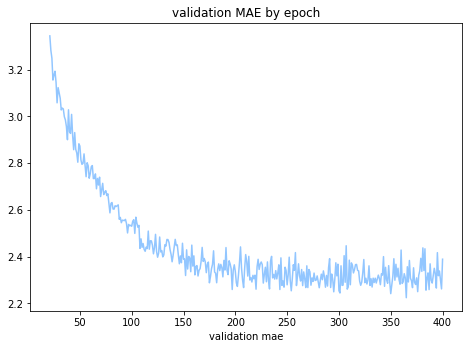

In [40]:
from sklearn.model_selection import KFold

kfold_epochs = 150
kfold_splits = 4
mae_history = []

print(f'performing K-fold cross validation: {kfold_splits} splits, {kfold_epochs} epochs...')

kfold = KFold(n_splits=kfold_splits, shuffle=True)
for train_i, val_i in kfold.split(x_data):
    model = build_model()
    hist = model.fit(x_data[train_i], y_data[train_i], validation_data=(x_data[val_i], y_data[val_i]), epochs=kfold_epochs, batch_size=16, verbose=0)

    mae_history.append(hist.history['val_mean_absolute_error'])

# get the mean of each step across all k runs
mae_history_np = np.array(mae_history)
mean_mae_history = np.mean(mae_history, axis=0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
first_plot_epoch = 20
ax.plot(range(first_plot_epoch + 1, mean_mae_history.shape[0] + 1), mean_mae_history[first_plot_epoch:])
ax.set_title("validation MAE by epoch")
ax.set_xlabel("epochs")
ax.set_xlabel("validation mae")

and now, we train our model

In [41]:
batch_size = 16
epochs = 150

model.fit(x_data, y_data,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

test_mse, test_mae = model.evaluate(x_test, y_test, verbose=0)
print('Test mse:', test_mse)
print('Test mae:', test_mae)

Epoch 1/150
404/404 [==============================] - 1s 3ms/step - loss: 5.5160 - mean_absolute_error: 1.5244
Epoch 2/150
404/404 [==============================] - 0s 224us/step - loss: 5.1960 - mean_absolute_error: 1.5250
Epoch 3/150
404/404 [==============================] - 0s 196us/step - loss: 6.0906 - mean_absolute_error: 1.7116
Epoch 4/150
404/404 [==============================] - 0s 196us/step - loss: 5.4855 - mean_absolute_error: 1.5868
Epoch 5/150
404/404 [==============================] - 0s 203us/step - loss: 4.7707 - mean_absolute_error: 1.4587
Epoch 6/150
404/404 [==============================] - 0s 192us/step - loss: 5.0279 - mean_absolute_error: 1.5308
Epoch 7/150
404/404 [==============================] - 0s 183us/step - loss: 4.5197 - mean_absolute_error: 1.4458
Epoch 8/150
404/404 [==============================] - 0s 186us/step - loss: 4.4739 - mean_absolute_error: 1.4686
Epoch 9/150
404/404 [==============================] - 0s 182us/step - loss: 4.6368 - mean